In [1]:
import pandas as pd

train_data = pd.read_csv('data_train.csv')
test_data = pd.read_csv('data_test.csv')

## printing the fiest 5 rows of the test data
print(train_data.head())

# shape
print(train_data.shape)

# The target variable is PT08.S1(C0) and there are 11 features in the data set, in the training data the data freame has 13 columns, where 12 columns are the features and the last column just assigns a number to the row.
# There are 6250 rows of data.

   Unnamed: 0  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0           0        797.0    -200.0       2.1          593.0    146.0   
1           1       1282.0    -200.0      11.0         1013.0    354.0   
2           2        891.0    -200.0       7.6          882.0    342.0   
3           3       1285.0    -200.0      18.1         1243.0    481.0   
4           4        892.0    -200.0       7.3          869.0     71.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1212.0     72.0         984.0        494.0  10.8  49.7  0.6429  
1         545.0    141.0        1384.0       1287.0  17.4  50.6  0.9989  
2         885.0    149.0         950.0        894.0   7.8  33.9  0.3594  
3         599.0    173.0        1815.0       1582.0  26.4  41.9  1.4237  
4         953.0     77.0        1363.0        632.0  37.4  14.7  0.9295  
(6250, 13)


In [2]:
#missing values

print("data before dropping missing values")    
print(train_data.isnull().sum())
## each of the columns in the features have 77 minssinf values

print("data after dropping missing values")
## dropping the mossinf values
train_data = train_data.dropna()

## What is inplace=True?
## this just drops the missing values from the data frame and does not return a new data frame

data before dropping missing values
Unnamed: 0        0
PT08.S1(CO)      77
NMHC(GT)         77
C6H6(GT)         77
PT08.S2(NMHC)    77
NOx(GT)          77
PT08.S3(NOx)     77
NO2(GT)          77
PT08.S4(NO2)     77
PT08.S5(O3)      77
T                77
RH               77
AH               77
dtype: int64
data after dropping missing values


In [3]:
# Extract the features from the data, the label is PT08.S1(CO).
# label = train_data['PT08.S1(CO)']   
# features = train_data.drop('PT08.S1(CO)', axis=1)  ## axis=1 means drop the column

y = train_data['PT08.S1(CO)']
X = train_data
print(X.head())
print("--------------------")
#print(label.head())



   Unnamed: 0  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0           0        797.0    -200.0       2.1          593.0    146.0   
1           1       1282.0    -200.0      11.0         1013.0    354.0   
2           2        891.0    -200.0       7.6          882.0    342.0   
3           3       1285.0    -200.0      18.1         1243.0    481.0   
4           4        892.0    -200.0       7.3          869.0     71.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1212.0     72.0         984.0        494.0  10.8  49.7  0.6429  
1         545.0    141.0        1384.0       1287.0  17.4  50.6  0.9989  
2         885.0    149.0         950.0        894.0   7.8  33.9  0.3594  
3         599.0    173.0        1815.0       1582.0  26.4  41.9  1.4237  
4         953.0     77.0        1363.0        632.0  37.4  14.7  0.9295  
--------------------


features before normalizing


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'NMHC(GT)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'PT08.S2(NMHC)'}>,
        <Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>,
        <Axes: title={'center': 'NO2(GT)'}>],
       [<Axes: title={'center': 'PT08.S4(NO2)'}>,
        <Axes: title={'center': 'PT08.S5(O3)'}>,
        <Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'AH'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

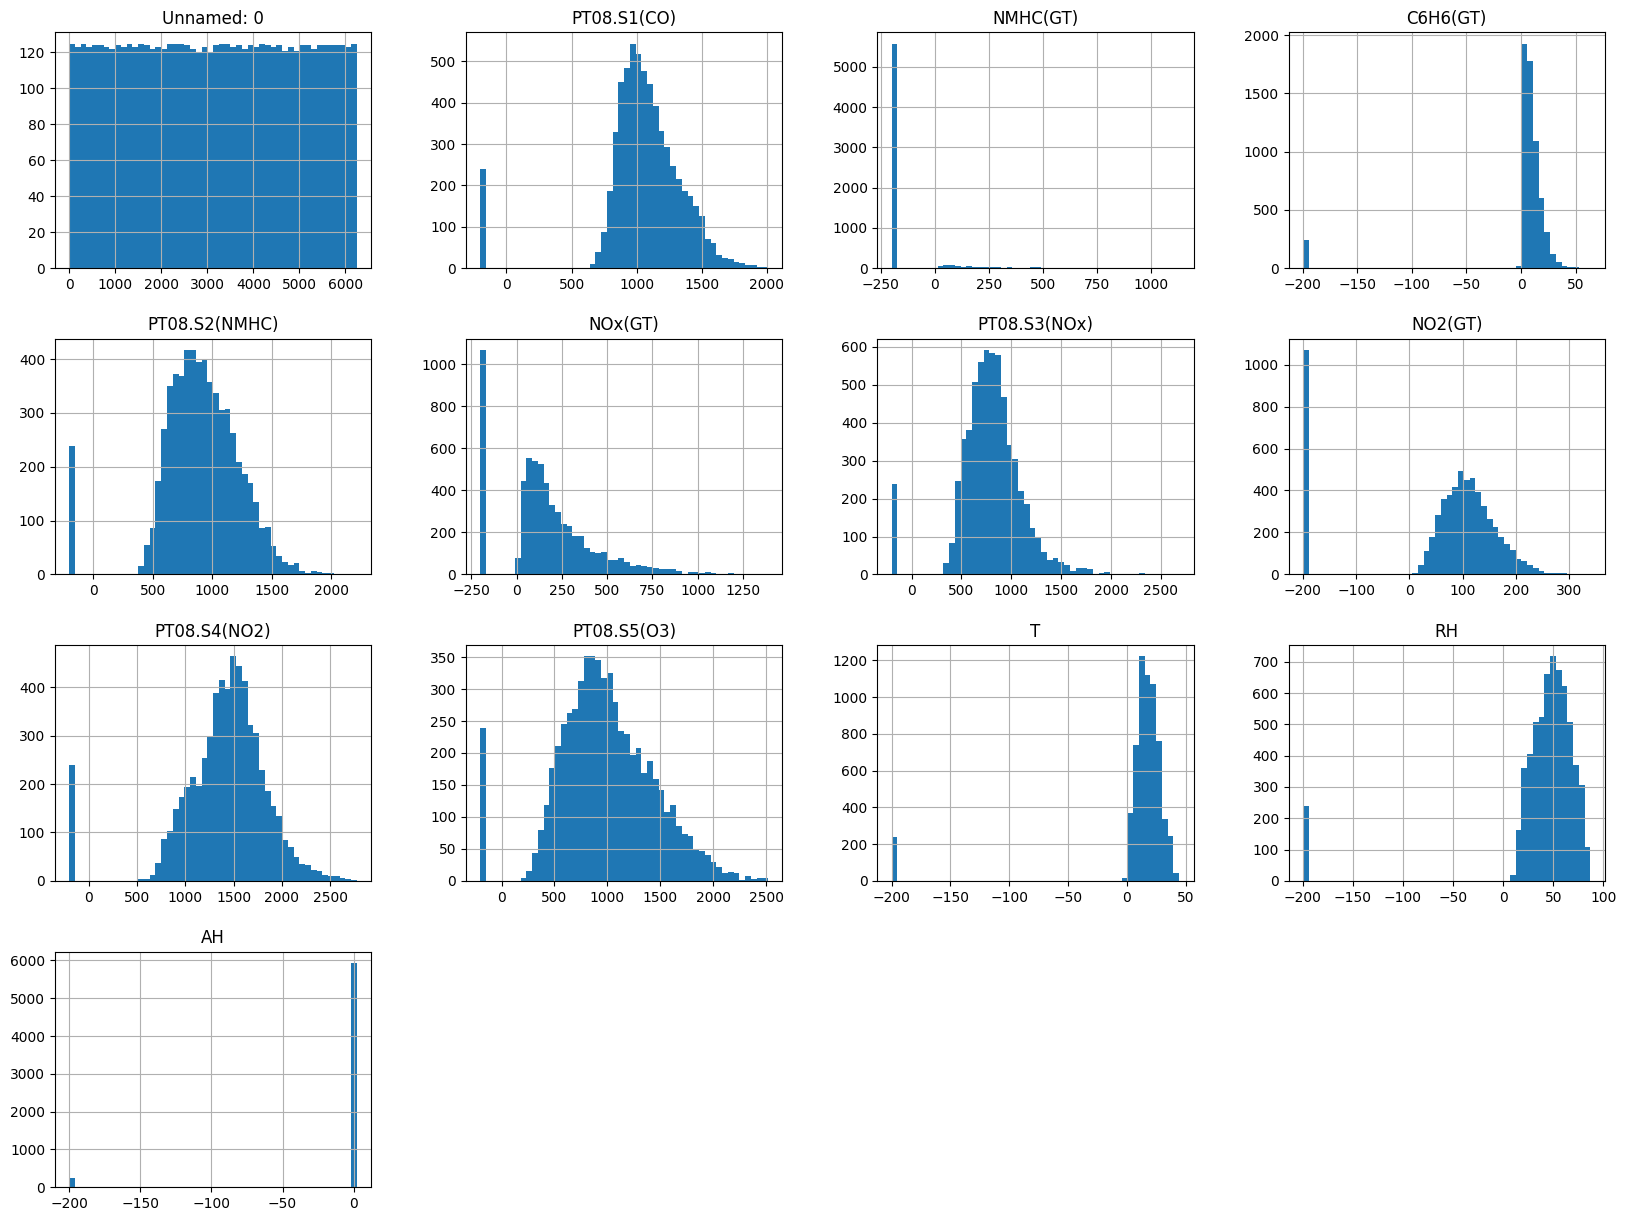

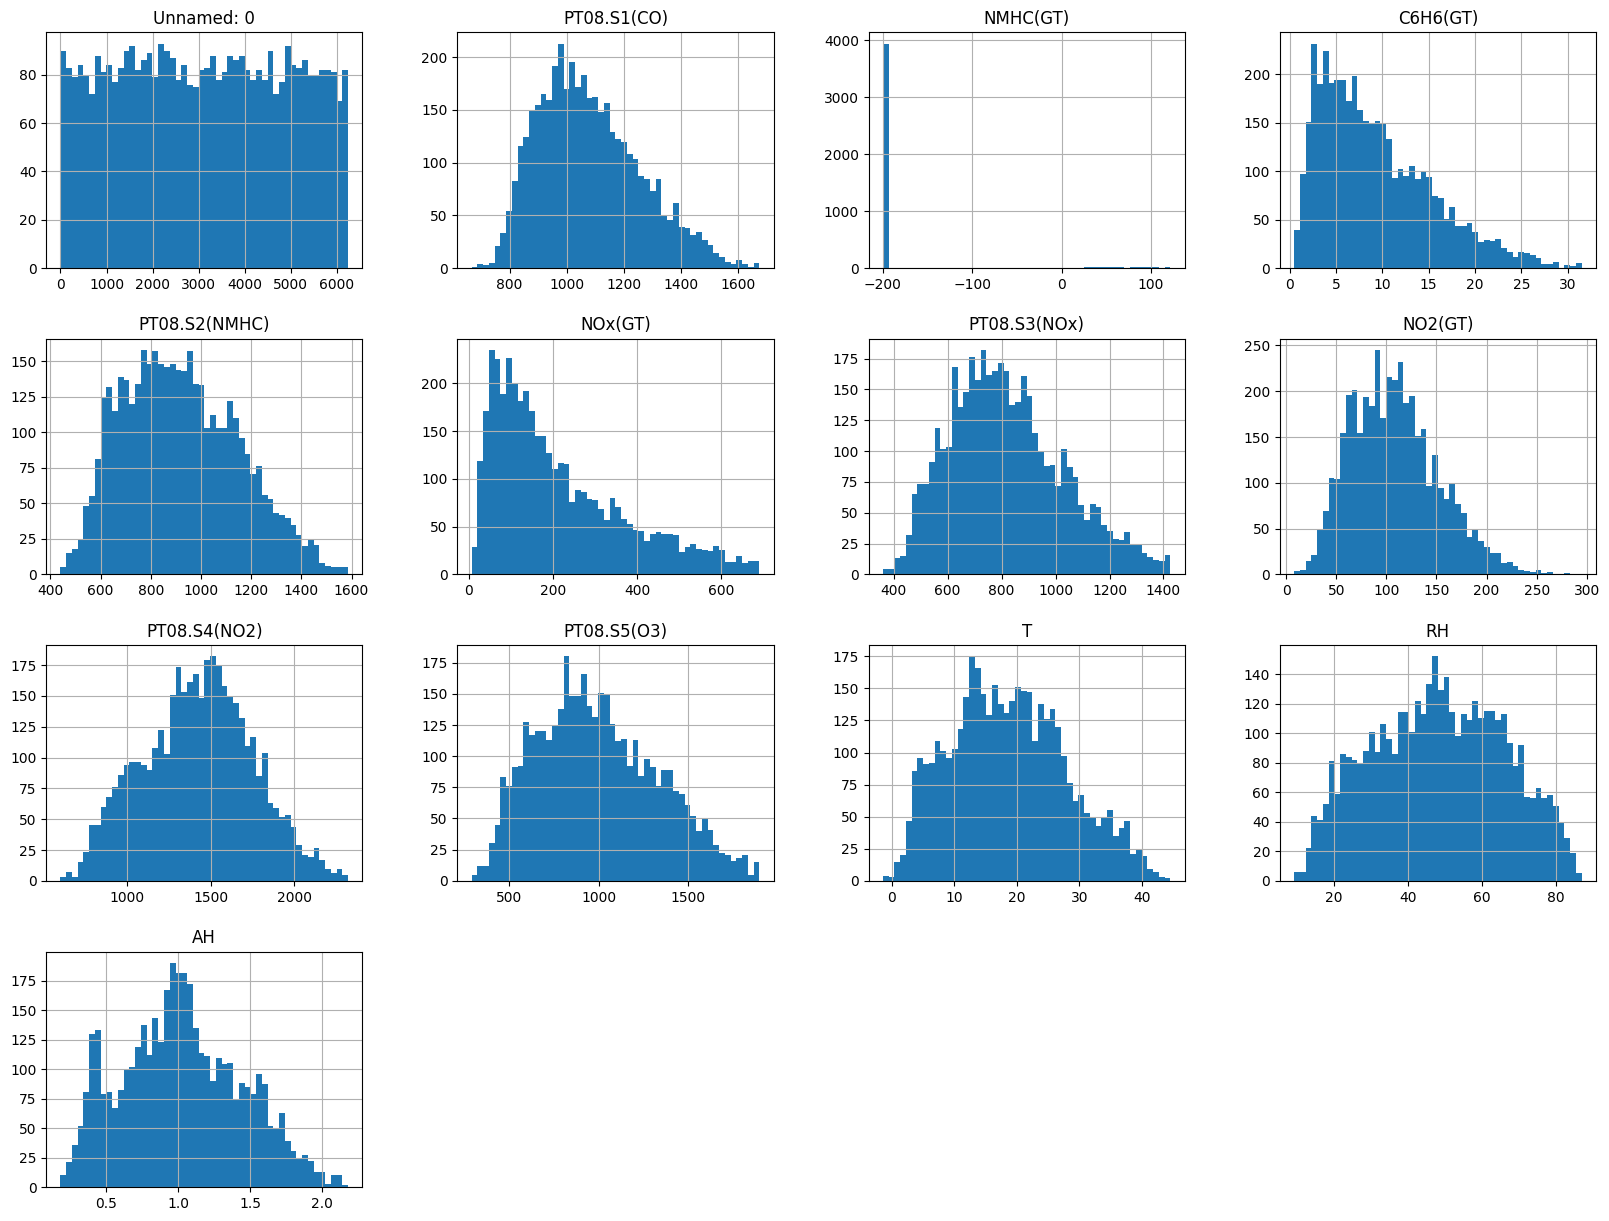

In [4]:
## plot histgrams for all the features
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from LinearRegression import LinearRegression
linear_model = LinearRegression()
print("features before normalizing")
X.hist(bins=50, figsize=(20,15)) ## bins is the number of bins to use in the histogram

X_clean = linear_model.clean(X)

## Getting rid  of some outliers 
X_clean.hist(bins=50, figsize=(20,15))




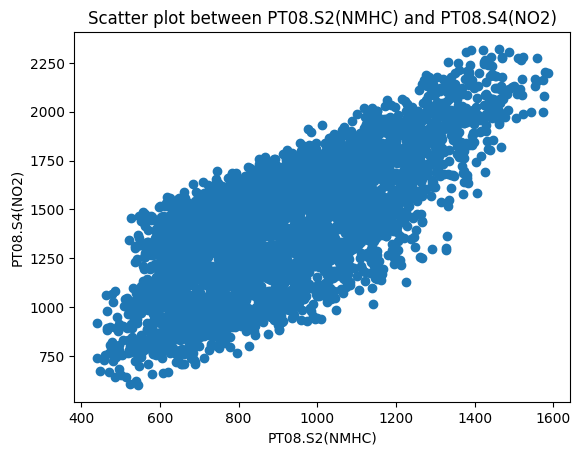

there seems to be a very high correlation between the two features


,Unnamed: 0,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,797.0,-200.0,2.1,593.0,146.0,1212.0,72.0,984.0,494.0,10.8,49.7,0.6429
1,1,1282.0,-200.0,11.0,1013.0,354.0,545.0,141.0,1384.0,1287.0,17.4,50.6,0.9989
2,2,891.0,-200.0,7.6,882.0,342.0,885.0,149.0,950.0,894.0,7.8,33.9,0.3594
3,3,1285.0,-200.0,18.1,1243.0,481.0,599.0,173.0,1815.0,1582.0,26.4,41.9,1.4237
4,4,892.0,-200.0,7.3,869.0,71.0,953.0,77.0,1363.0,632.0,37.4,14.7,0.9295


In [5]:
#Pick two feature and create a scatter plto between the twp
plt.scatter(X_clean['PT08.S2(NMHC)'], X_clean['PT08.S4(NO2)'])
plt.xlabel('PT08.S2(NMHC)')
plt.ylabel('PT08.S4(NO2)')
plt.title('Scatter plot between PT08.S2(NMHC) and PT08.S4(NO2)')
plt.show()

print("there seems to be a very high correlation between the two features")
X_clean.head()

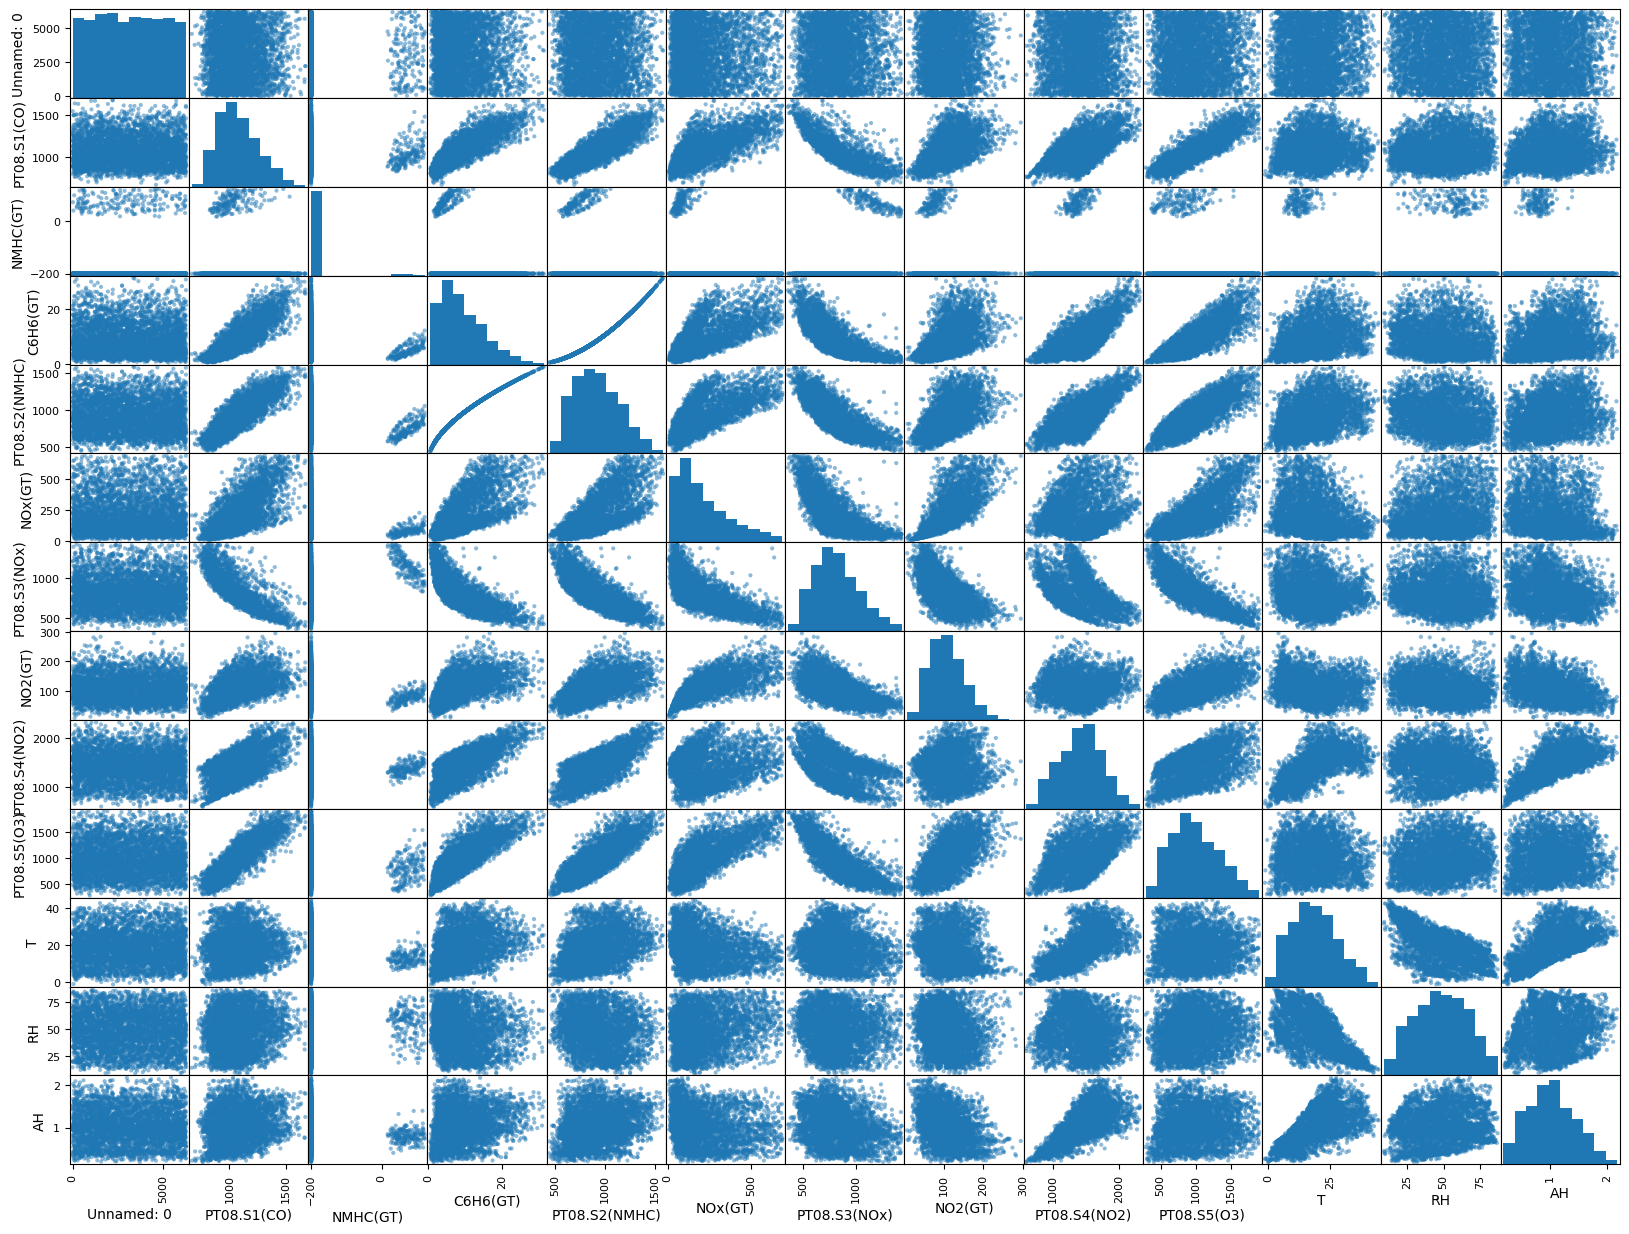

In [6]:
## now plotting every compbination of the features
from pandas.plotting import scatter_matrix
scatter_matrix(X_clean, figsize=(20,15))
plt.show()


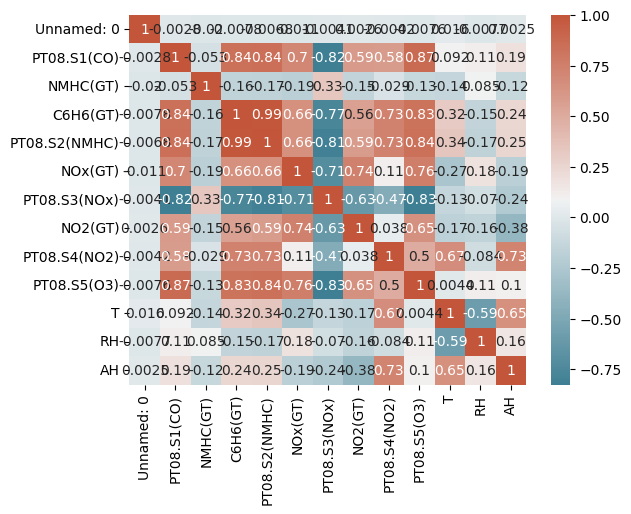

In [7]:
import seaborn as sns
corr = X_clean.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [8]:
print(X_clean.columns)
print(test_data.columns)
X_clean, y_clean = linear_model.drop_target(X_clean, 'PT08.S1(CO)')
x_test_clean = test_data
x_clean_scaled= linear_model.scale(X_clean)


Index(['Unnamed: 0', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')
Index(['Unnamed: 0', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH'],
      dtype='object')


In [9]:




linear_model.fit(x_clean_scaled, y_clean)
y_train_predicted = linear_model.predict(x_clean_scaled)
r2 = linear_model.r2_score(y_clean, y_train_predicted)
r2

np.float64(0.8519950671087955)

In [10]:
y_clean_log = np.where(y_clean <= 1000, 0, 1)
# y_clean_test_log = np.where(y_test_clean <= 1000, 0, 1)
print(y_clean_log[0:5])
print(y_clean[0:5])

[0 1 0 1 0]
0     797.0
1    1282.0
2     891.0
3    1285.0
4     892.0
Name: PT08.S1(CO), dtype: float64


In [11]:
import LogisticRegression as lr

logistic_model = lr.LogisticRegression()
logistic_model.fit(x_clean_scaled, y_clean_log)
y_predicted_test_log = logistic_model.predict(x_clean_scaled)
print("Predictions")
print(y_predicted_test_log)
print("Actual")
print(y_clean_log)
print(type(x_clean_scaled))
print(type(y_clean))
if y_clean is not np.ndarray:
    y_clean = y_clean.to_numpy()


Predictions
[0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 

In [18]:
# 5 fold cross validation
import ResultAnalysis as ra

# Linear Regression 5-cross validation
ra.k_fold_cross_validation_RMSE(x_clean_scaled, y_clean, 5)

# Logistic Regression 5-cross validation
ra.k_fold_cross_validation(x_clean_scaled, y_clean_log, 5)





In [1]:
# Use logistic regression from scikit-learn
from sklearn.linear_model import LogisticRegression as sklr
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

model = sklr()
model.fit(x_clean_scaled, y_clean_log)

NameError: name 'x_clean_scaled' is not defined